<a href="https://colab.research.google.com/github/mysterious-moon/Sales-Prediction---Feature-Engineering/blob/main/Sales_Prediction_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BigMart Sales Prediction

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/Comp-4.jpg)

## Objective

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

__So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.__






## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)

## Get the Dataset

You can download the dataset manually from [this link](https://drive.google.com/file/d/1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8/view?usp=sharing) or use the following code snippet to load in in google colab directly.

In [1]:
!gdown --id 1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
To: /content/sales_prediction.csv
100% 870k/870k [00:00<00:00, 11.2MB/s]


## Load th dataset

In [2]:
import pandas as pd

df = pd.read_csv("sales_prediction.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Prepare Training and Test Datasets

We need data to train model and need unseen data to measure model performance

USE :      
70% data for Training and 30% data for Testing.
Seed = 42 for reproducibility

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED = 42

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = SEED)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [7]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [8]:
y_train.head()

,Item_Outlet_Sales
1921,117.8466
655,1230.3984
2229,4933.5780
2537,1789.6704
3528,3872.9586


# Data Wrangling, EDA and Feature Engineering

In [9]:
# make a copy of the data for explorations and modifications

X_train_c = X_train.copy()

## Basic EDA

In [10]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [11]:
X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [12]:
num_data = X_train_c.select_dtypes(exclude = ['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [13]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [14]:
num_data.isnull().sum()

,0
Item_Weight,1023
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

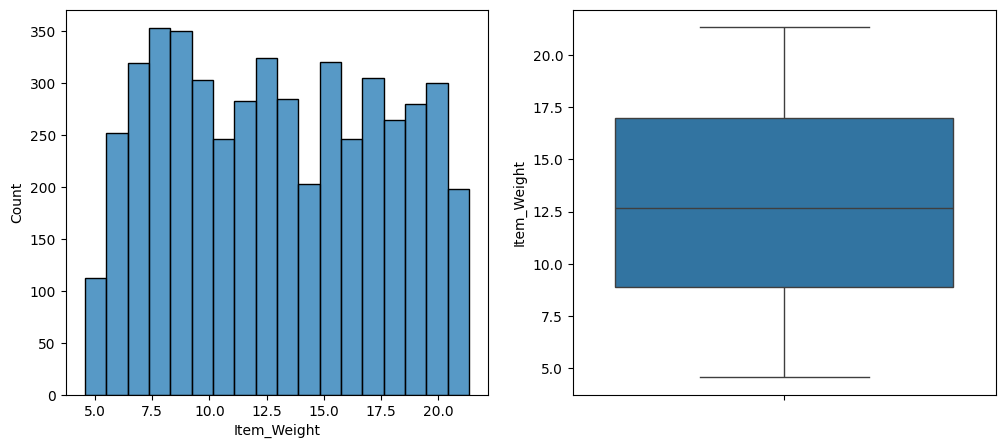

In [16]:
# Visulaise the numeric data as Univariate Analysis

fig , ax = plt.subplots( 1 , 2, figsize = (12,5))

sns.histplot(data = X_train_c, x = 'Item_Weight', ax = ax[0]);
sns.boxplot(data = X_train_c, y = 'Item_Weight', ax = ax[1]);

In [17]:
def visualize_numeric_feature( data_frame, col_name):
  fig , ax = plt.subplots( 1 , 2, figsize = (12,5))
  sns.histplot(data = data_frame, x = col_name, ax = ax[0]);
  sns.boxplot(data = data_frame, y = col_name, ax = ax[1]);


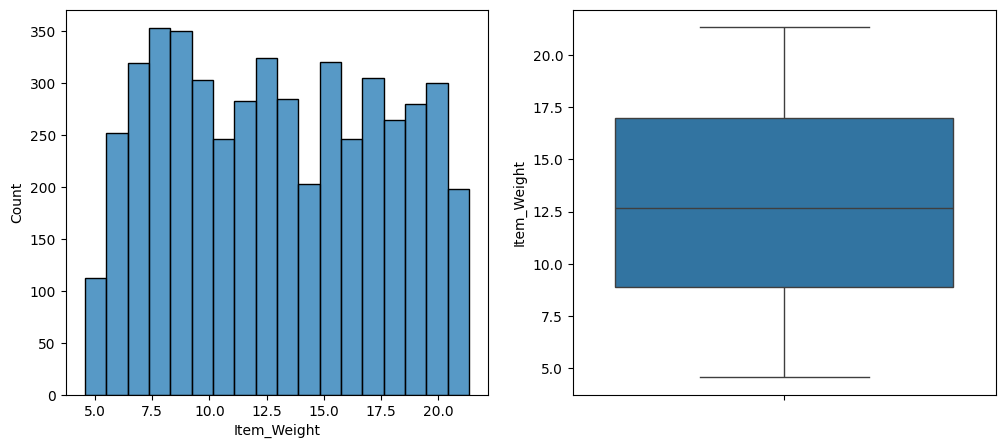

In [18]:
visualize_numeric_feature(data_frame=X_train_c, col_name='Item_Weight')

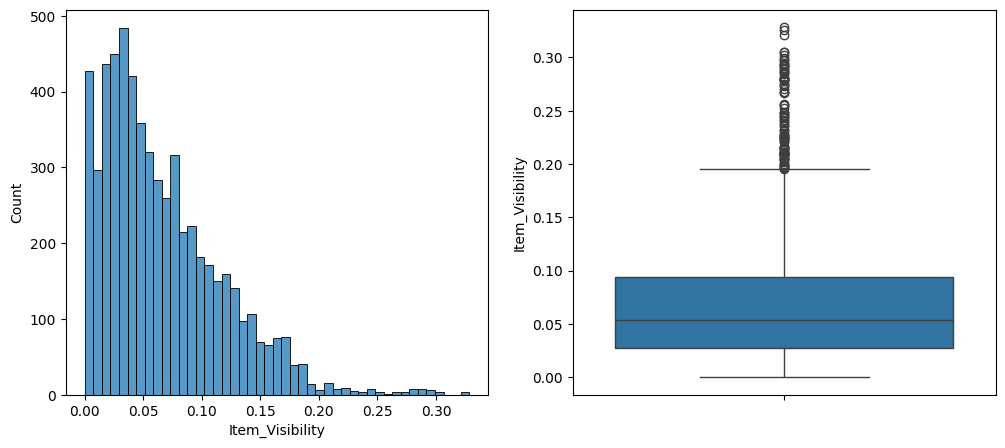

In [19]:
visualize_numeric_feature(X_train_c, 'Item_Visibility')

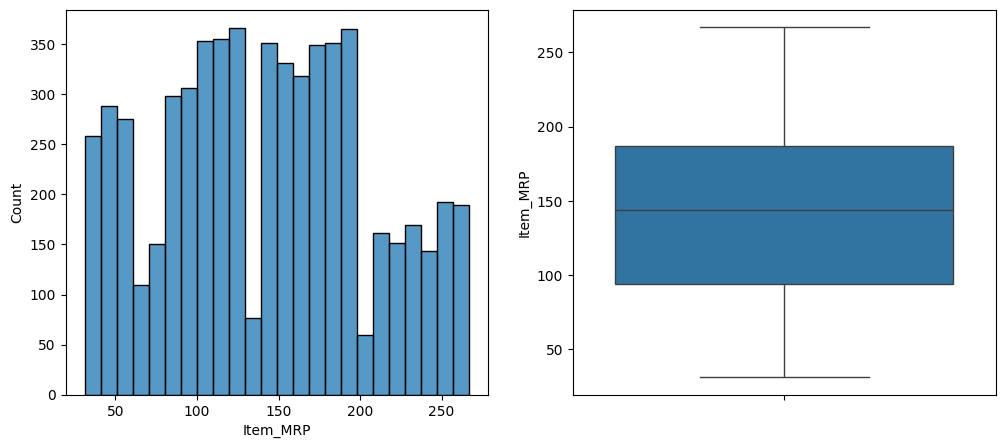

In [20]:
visualize_numeric_feature(X_train_c, 'Item_MRP')

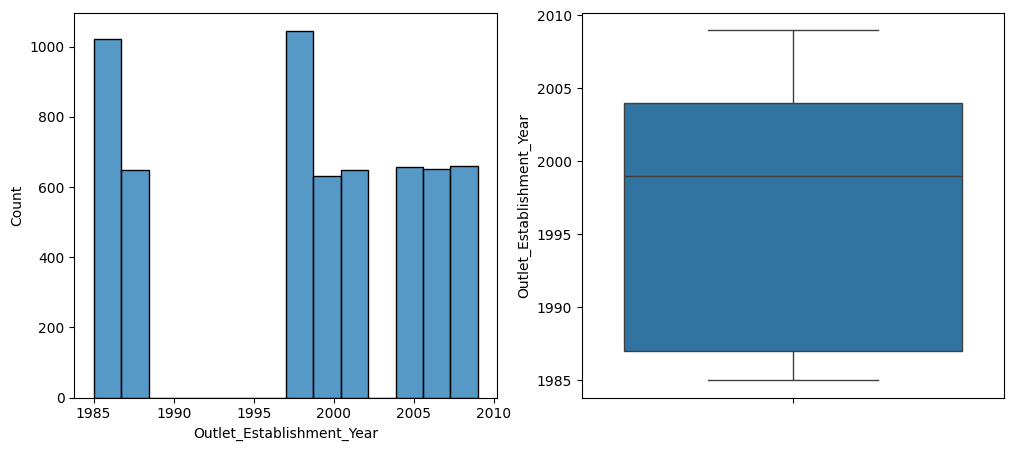

In [21]:
visualize_numeric_feature(X_train_c, 'Outlet_Establishment_Year')

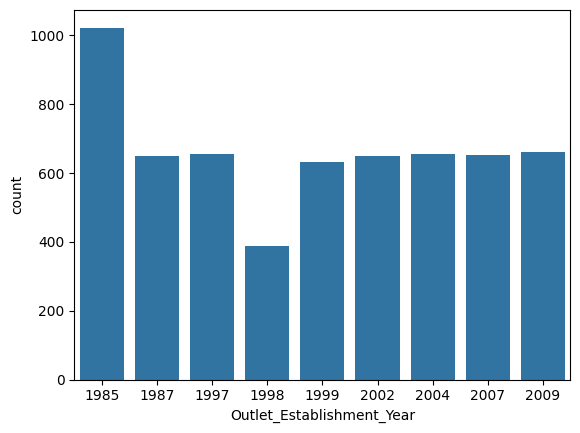

In [22]:
# establishment year is a discrete variable hence Countplot will be more suited.
# Boxplot shows continuous years of establishment

sns.countplot(data = X_train_c, x = 'Outlet_Establishment_Year');


In [23]:
cat_features = X_train_c.select_dtypes(include = ['object'])

In [24]:
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [25]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


A high value of 'unique' suggests high Cardinality , i.e. , more number of distinct categories

In [26]:
cat_features.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,1690
Outlet_Location_Type,0
Outlet_Type,0


In [27]:
cat_features['Item_Identifier'].value_counts()

,count
Item_Identifier,
NCI54,9
FDF52,9
FDV60,8
FDT07,8
NCB18,8
...,...
FDT47,1
NCW42,1
DRH59,1


In [28]:
cat_features['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


We need to standardize Low Fat, LF and low fat categoriRes. Same is the case with Regular and reg categories. We need to combine them into a same categorical string. We need to make these consistent even before we go to Feature Engineering or Encoding.

In [29]:
cat_features['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,905
Snack Foods,835
Household,648
Frozen Foods,591
Dairy,474
Canned,450
Baking Goods,438
Health and Hygiene,365
Soft Drinks,305


In [30]:
cat_features['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,668
OUT018,661
OUT046,656
OUT035,656
OUT017,652
OUT045,649
OUT013,649
OUT049,631
OUT010,389


In [31]:
cat_features['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,1960
Small,1667
High,649


In [32]:
cat_features['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,2367
Tier 2,1957
Tier 1,1642


In [33]:
cat_features['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,3893
Grocery Store,744
Supermarket Type3,668
Supermarket Type2,661


**Data Wrangling and Feature Engineering**

In [34]:
# Creating High level Item types
# Showcasing only the initial two characters

X_train_c['Item_Identifier'].apply(lambda x : x[:2])

,Item_Identifier
1921,FD
655,NC
2229,FD
2537,FD
3528,FD
...,...
5734,FD
5191,FD
5390,NC
860,FD


In [35]:
X_train_c['Item_Identifier'].apply(lambda x : x[:2]).value_counts()

,count
Item_Identifier,
FD,4269
NC,1137
DR,560


In [36]:
# or may be use .str instead of apply since apply takes longer to compute

X_train_c['Item_Identifier'].str[:2]

,Item_Identifier
1921,FD
655,NC
2229,FD
2537,FD
3528,FD
...,...
5734,FD
5191,FD
5390,NC
860,FD


In [37]:
X_train_c['Item_Identifier'].str[:2].value_counts()

,count
Item_Identifier,
FD,4269
NC,1137
DR,560


In [38]:
# Mapping Item IDs to Item Types

def create_item_type(data_frame):
  data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
  data_frame['Item_Type'] = data_frame['Item_Type'].map({
      'FD': 'Food',
      'NC': 'Non_Consumables',
      'DR': 'Drink'
  })
  return data_frame

In [39]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [40]:
# Filling in the missing values for Item_Weight

X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [41]:
X_train_c[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by = ['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


For the same item Id, there are missing corresponding values of Item_Weight. eg, DRA59.

In [42]:
X_train_c[['Item_Type', 'Item_Weight']].drop_duplicates().sort_values(by = ['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


#How to fill in missing values for Item_Weight

STEP 1. Use mapping of Item id, find corresponding weight and fill in the missing values

STEP 2. If a completely new item occurs, i.e.,item_id is not in the test or live data, Use the item type - median(weight) and fill it in place of the missing values.

In [43]:
#making a pivot table
ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values = 'Item_Weight', index = 'Item_Identifier').reset_index()
ITEM_ID_WEIGHT_PIVOT

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1517,NCZ30,6.590
1518,NCZ41,19.850
1519,NCZ42,10.500
1520,NCZ53,9.600


In [44]:
# Converting the pivot table into a dictionary

ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In case there is a missing weight value against an Item_id, we can refer this dictionary and find it's value for substitution.

In [45]:
# In case of a missing Item_id or new item

ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values = 'Item_Weight', index = 'Item_Type', aggfunc = 'median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)])

In [46]:
def impute_item_weight(data_frame):
  # first logic for item_id and weight
  data_frame.loc[:,'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))

  # Second Logic for item_type and weight if any of them is still missing
  data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

  return data_frame

In [47]:
X_train_c = impute_item_weight(X_train_c)

In [48]:
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.60,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [49]:
X_train_c.isnull().sum()

#item_weight fields are completely filled in

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


#STEP 3 : Fill in the missing values for Outlet_Size

In [50]:
X_train_c.groupby( by = ['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

For Supermarket Type 1, there are multiple Outlet sizes. So, we shall use the mode of the given sizes.

#Logic for imputing missing values of Outlet sizes
1. Mapping of Outlet_Type and mode(Outlet_size)
2. Fill in those values

In [51]:
from scipy.stats import mode


def get_mode(series):
  return series.mode().iloc[0]

OUTLET_TYPE_SIZE_PIVOT = X_train_c.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type', aggfunc= get_mode).reset_index()
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING.items()

dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

In [52]:
def impute_outlet_size(data_frame):
  data_frame.loc[:, 'Outlet_Size'] = data_frame.loc[:, 'Outlet_Size'].fillna(data_frame.loc[:, 'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
  return data_frame

In [53]:
X_train_c = impute_outlet_size(X_train_c)

In [54]:
X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# Standardize Item_Fat_Content categories

In [55]:
X_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


In [56]:
# Make Item fat content categories consisitent

def standardize_item_fat_content(data_frame):
  data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({
      'LF': 'Low Fat',
      'low fat': 'Low Fat',
      'reg': 'Regular'
  })
  return data_frame

In [57]:
X_train_c = standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()


,count
Item_Fat_Content,
Low Fat,3860
Regular,2106


# Correct Item Fat content for non- consumables

In [58]:
X_train_c.groupby(by = ['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low Fat              517
                 Regular               43
Food             Low Fat             2206
                 Regular             2063
Non_Consumables  Low Fat             1137
dtype: int64

In [59]:
# All the Non-Consumables that have Fat content wrongly updated
X_train_c.loc[X_train_c['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content']

,Item_Fat_Content
655,Low Fat
4423,Low Fat
907,Low Fat
7021,Low Fat
6074,Low Fat
...,...
8322,Low Fat
466,Low Fat
6265,Low Fat
5390,Low Fat


In [60]:
# Correct Item Fat Content for non-consumables

def correct_item_fat_content(data_frame):
  data_frame.loc[data_frame['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Non_Edible'

  return data_frame

In [61]:
X_train_c = correct_item_fat_content(X_train_c)
X_train_c.groupby(by = ['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low Fat              517
                 Regular               43
Food             Low Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [62]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


# Prepare Datasets for ML

In [63]:
def prepare_dataset(data_frame):

  # Step 1 : Create Item Type
  data_frame = create_item_type(data_frame)

  # Step 2 : Fill in missing values for Item_Weight
  data_frame = impute_item_weight(data_frame)

  # Step 3 : Impute missing values for Outlet_Size
  data_frame = impute_outlet_size(data_frame)

  # Step 4 : Make Item Fat content categories consistent
  data_frame = standardize_item_fat_content(data_frame)

  # Step 5 : Correct Item Fat content for non-consumables
  data_frame = correct_item_fat_content(data_frame)

  return data_frame

In [64]:
X_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [65]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [66]:
X_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,440
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,720
Outlet_Location_Type,0


In [67]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# Handling Categorical Data

Expt 1 : All categorical columns - one hot encoded

In [68]:
cat_feats = X_train.select_dtypes(include = ['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [69]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

# new categories in test or future data would be ignored because the training data never saw it.

OneHotEncoder(handle_unknown='ignore')

In [70]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [71]:
num_feats_train = X_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [72]:
cat_feats_train = X_train.select_dtypes(include = ['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [73]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis = 1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [74]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [75]:
num_feats_test = X_test.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_test = X_test.select_dtypes(include = ['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns = ohe_feature_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis = 1)

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Modeling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

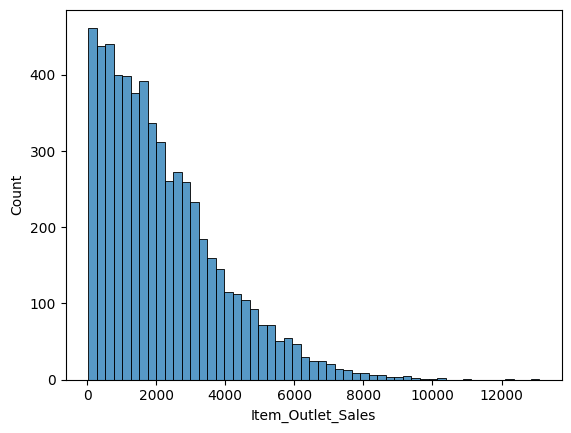

In [76]:
sns.histplot(y_train)

 Using Tree based models for this particular use case

In [77]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

In [78]:
def train_and_eval_model(model, X_train, y_train, cv = 5):
  cv_results = cross_validate(model, X_train, y = y_train,cv = cv, scoring = ('r2', 'neg_root_mean_squared_error'),)
  print('Model:', model)
  r2_scores = cv_results['test_r2']
  print('R2 CV scores: ', r2_scores)
  print('R2 Cv scores mean/ stdev: ', np.mean(r2_scores), np.std(r2_scores))

  rmse_scores = cv_results['test_neg_root_mean_squared_error']
  rmse_scores = [-1 * score for score in rmse_scores]
  print('RMSE CV scores: ', rmse_scores)
  print('RMSE CV scores mean / stdev :', np.mean(rmse_scores), '/', np.std(rmse_scores))


The negative RMSE is used because scikit-learn's cross-validation scorers are designed to maximize the score, and lower RMSE is better.

In [79]:
# Random Forest Model
rf = RandomForestRegressor(random_state = SEED)
train_and_eval_model(model = rf, X_train = X_train_final, y_train = y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores:  [0.57073692 0.52677275 0.54281021 0.55416213 0.52017727]
R2 Cv scores mean/ stdev:  0.542931856825924 0.018320169188775326
RMSE CV scores:  [1103.9004638321248, 1168.524688117147, 1180.6054342042014, 1154.5057572254977, 1202.0836655939197]
RMSE CV scores mean / stdev : 1161.9240017945783 / 32.94578845147697


In [80]:
# Gradient Boosting Model
gb = GradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model = gb, X_train = X_train_final, y_train = y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores:  [0.6065274  0.59366925 0.57356358 0.60924345 0.55022613]
R2 Cv scores mean/ stdev:  0.5866459646024772 0.022148578096336337
RMSE CV scores:  [1056.8793046591481, 1082.786581771003, 1140.2068860094903, 1080.838373141466, 1163.8349579736446]
RMSE CV scores mean / stdev : 1104.9092207109504 / 40.23395923794627


In [81]:
# Histogram Gradient Boosting Model
hgb = HistGradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model = hgb, X_train = X_train_final, y_train = y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores:  [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 Cv scores mean/ stdev:  0.5613284973532673 0.0205841656268121
RMSE CV scores:  [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV scores mean / stdev : 1138.235415343526 / 35.957026103361265


Histogram Gradient Boosting and Light GBM can handle Categorical data natively without doing One-Hot Encoding.

In [82]:
# Xtreme Gradient Boosting Model
xgr = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = SEED)
train_and_eval_model(model = xgr, X_train = X_train_final, y_train = y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores:  [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 Cv scores mean/ stdev:  0.5577825481764618 0.021778582707669483
RMSE CV scores:  [1095.416494682338, 1127.8526118741622, 1178.792371186943, 1115.290340217991, 1196.893076803

In [83]:
# Light GBM
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model = lgbr, X_train = X_train_final, y_train = y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

# Handling Categorical Data

Expt 2 : All categorical columns - Native Handling

In [84]:
X_train_copy = X_train.copy().drop(columns = 'Item_Identifier')

cat_cols = X_train_copy.select_dtypes(include = ['object']).columns.tolist()
num_cols = cal_cols = X_train_copy.select_dtypes(exclude = ['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [85]:
X_train_copy[cat_cols] = X_train_copy[cat_cols].astype('category') # earlier they were type 'object'
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
X_train_copy = X_train_copy[cat_cols + num_cols]

X_train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [86]:
categorical_mask = [True]* n_categorical_features + [False]*n_numerical_features
categorical_mask

[True, True, True, True, True, True, False, False, False, False]

In [87]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask = [True]* n_categorical_features + [False]*n_numerical_features

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan),make_column_selector(dtype_include = 'category'),
    ),
    remainder = "passthrough",
 )

hgb = make_pipeline(
    ordinal_encoder, HistGradientBoostingRegressor(
        random_state =  42, categorical_features = categorical_mask
    ),
)

train_and_eval_model(model = hgb, X_train = X_train_copy, y_train = y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad823da3ed0>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                         

In [88]:
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model = lgbr, X_train = X_train_copy, y_train = y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 10
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 10
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Light GBM runs very quickly in comparison to Histogram GBM but there isn't a significant improvement in RMSE. This tells us that we made need to do the transformation ourselves. The model may not be able to natively give you that good performance

# Handling Categorical Data

1. We will consider the same categorical data that we had except for the Item_id
2. Then perform One Hot Encoding

**Expt 3 : No Item Identifier- One Hot Encoded**

In [89]:
# OneHot Encoding will be performed on these columns
X_train.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier').head()


,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [90]:
cat_feats = X_train.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier')
ohe =  OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features = cat_feats.columns)
ohe_feature_names

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Non_Edible',
       'Item_Fat_Content_Regular', 'Item_Type_Drink', 'Item_Type_Food',
       'Item_Type_Non_Consumables', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

We are keeping the numeric features as they are. We could scale them but for Tree based models, we usually don't need to scale the data

In [91]:
num_feats_train = X_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_train = X_train.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier')
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_feature_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis = 1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumables,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [92]:
X_train_final.shape

(5966, 30)

The number of features have reduced from around 1500 to 30 features now.

We will try all the models again now

In [93]:
gb = GradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model = gb, X_train = X_train_final, y_train = y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores:  [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 Cv scores mean/ stdev:  0.5891824563495011 0.01880337124010431
RMSE CV scores:  [1061.9286612011877, 1094.5675808387577, 1135.1580306171122, 1069.8223327510743, 1146.040671315857]
RMSE CV scores mean / stdev : 1101.5034553447979 / 33.864902948875674


In [94]:
hgb = HistGradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model = hgb, X_train = X_train_final, y_train = y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores:  [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 Cv scores mean/ stdev:  0.5613284973532673 0.0205841656268121
RMSE CV scores:  [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV scores mean / stdev : 1138.235415343526 / 35.957026103361265


In [95]:
xgr = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = SEED)
train_and_eval_model(model = xgr, X_train = X_train_final, y_train = y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores:  [0.52348154 0.47860959 0.45772502 0.49196841 0.46576096]
R2 Cv scores mean/ stdev:  0.48350910211416415 0.023122182697374725
RMSE CV scores:  [1163.075778281383, 1226.547983760074, 1285.7789125594438, 1232.403674476319, 1268.41713837

Results of previous xgb with over 1500 features. Sharing here for ease of comparison between the results.

Model: RandomForestRegressor(random_state=42)
R2 CV scores:  [0.57073692 0.52677275 0.54281021 0.55416213 0.52017727]
R2 Cv scores mean/ stdev:  0.542931856825924 0.018320169188775326
RMSE CV scores:  [1103.9004638321248, 1168.524688117147, 1180.6054342042014, 1154.5057572254977, 1202.0836655939197]
RMSE CV scores mean / stdev : 1161.9240017945783 / 32.94578845147697


Error has actually decreased.

In [96]:
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model = lgbr, X_train = X_train_final, y_train = y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

# Handling categorical data

**Expt 4: Item Identifier will be feature hashed and the rest of the categorical features are One Hot Encoded

In [97]:
X_train['Item_Identifier'].head()

,Item_Identifier
1921,FDN08
655,NCJ42
2229,FDY47
2537,FDN45
3528,FDY16


In [105]:
# DataFrame of hashed representations of the Item_Identifier entries from X_train, transforming categorical data into a numerical format suitable for analysis or modeling.
# Transforming Item_Identifier into a hashed vector

from sklearn.feature_extraction import FeatureHasher

hash_vector_size = 50
fh = FeatureHasher(n_features = hash_vector_size, input_type = 'string')
hashed_df = pd.DataFrame(fh.transform(X_train['Item_Identifier'].astype(str).apply(lambda x: [x])).toarray(),columns = ['H' + str(i) for i in range(hash_vector_size)])

hashed_df.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# One Hot Encoder is applied to all the categorical columns except Item_Identifier

cat_feats = X_train.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier')
ohe =  OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features = cat_feats.columns)
ohe_feature_names

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Non_Edible',
       'Item_Fat_Content_Regular', 'Item_Type_Drink', 'Item_Type_Food',
       'Item_Type_Non_Consumables', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [103]:
num_feats_train = X_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_train = X_train.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier')
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_feature_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe, hashed_df], axis = 1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumables,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
X_train_final.shape

(5966, 80)

In [107]:
gb = GradientBoostingRegressor(random_state = SEED)
train_and_eval_model(model = gb, X_train = X_train_final, y_train = y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores:  [0.60407507 0.58488457 0.57172934 0.61687349 0.55111926]
R2 Cv scores mean/ stdev:  0.5857363450137324 0.023242612282007528
RMSE CV scores:  [1060.1677108995837, 1094.4286657628252, 1142.65645170156, 1070.2339559145403, 1162.6788624641338]
RMSE CV scores mean / stdev : 1106.0331293485287 / 40.17433963002734


In [108]:
xgr = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = SEED)
train_and_eval_model(model = xgr, X_train = X_train_final, y_train = y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores:  [0.5362842  0.48629738 0.47790689 0.53147428 0.45311539]
R2 Cv scores mean/ stdev:  0.4970156270546607 0.032052064589185754
RMSE CV scores:  [1147.345182317805, 1217.4718079987892, 1261.6256051160717, 1183.5165739039319, 1283.3412067

RMSE has deccreased and R2 has increased. This is the best model so far

In [109]:
hashed_test_df = pd.DataFrame(fh.transform(X_test['Item_Identifier'].astype(str).apply(lambda x: [x])).toarray(),columns = ['H' + str(i) for i in range(hash_vector_size)])
num_feats_test = X_test.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_test = X_test.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier')
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns = ohe_feature_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe, hashed_test_df], axis = 1)

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumables,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,14.300,0.026300,79.4302,1987,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
X_test_final.shape

(2557, 80)

X_test also has 80 features

In [111]:
# We haven't tuned the model. If we had, it'll probably improve a bit more in performance

xgr = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = SEED)
xgr.fit(X_train_final, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [112]:
y_pred = xgr.predict(X_test_final)

In [116]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt




In [118]:
print('R2 Score :', r2_score(y_test, y_pred))
print('RMSE Score :', mean_squared_error(y_test, y_pred))

R2 Score : 0.5428562758399575
RMSE Score : 1280456.6124461796


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

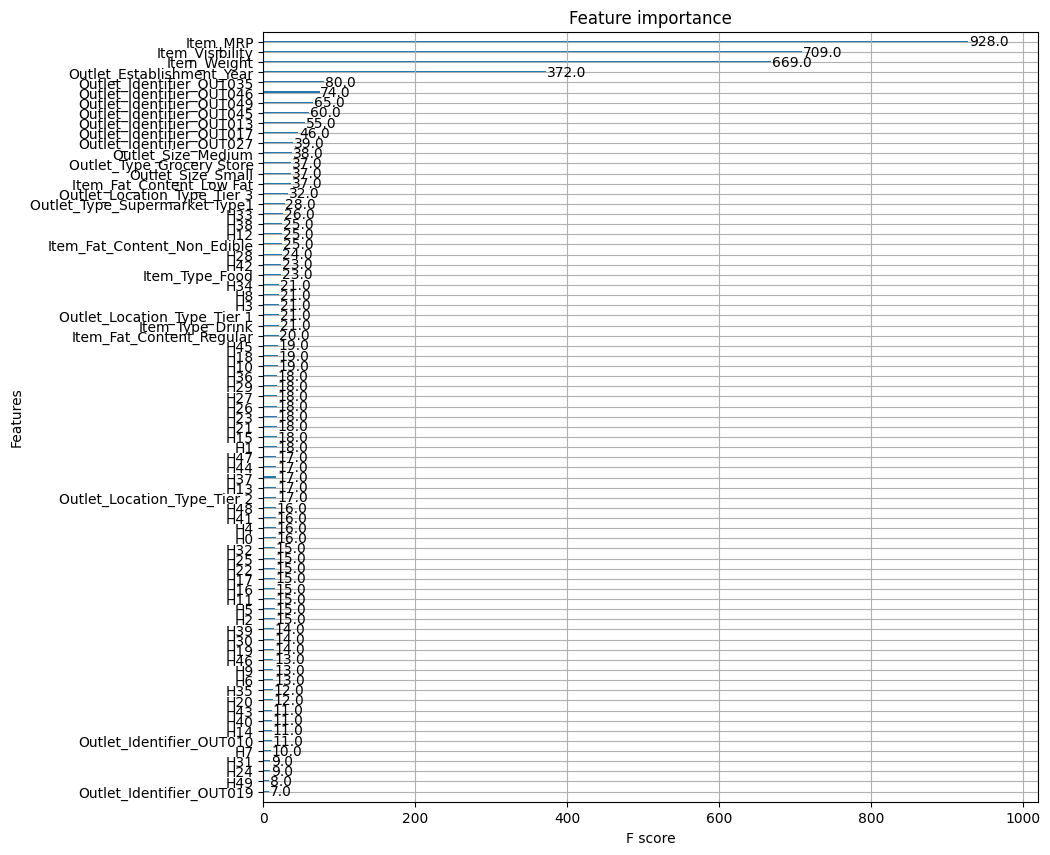

In [119]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1,figsize = (10, 10))
plot_importance(xgr, ax = ax)

We could try Hashing on other columns and also use Label Encoding instead of One HOt Encoding on columns Outlet_size, Outlet_location_type since these are ordinal categorical data. For others, We could do OneHot Encoding or Target Level Encoding, Target mean encoding, Weight of Evidence and such different types of Feature Engineering Techniques can be used especially for categorical data